# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
DATA_DIR = '../dataset/raw/'

with open(DATA_DIR + 'features.txt') as f:
    features_txt = f.readlines()

features_name = [x.strip() for x in features_txt]

X_train = pd.read_csv(DATA_DIR + 'X_train.csv', names=features_name)
X_test = pd.read_csv(DATA_DIR + 'X_test.csv', names=features_name)
y_train = pd.read_csv(DATA_DIR + 'y_train.csv', names=['activity_label'])
subject_train = pd.read_csv(DATA_DIR + 'subject_train.csv', names=['subject_id'])

In [3]:
X_train.shape

(5080, 561)

In [4]:
X_test.shape

(5219, 561)

In [5]:
y_train.shape

(5080, 1)

In [6]:
subject_train.shape

(5080, 1)

In [7]:
# 欠損はない
print("================================train_raw null rate================================")
print(sum(X_train.isna().mean() > 0))
print("================================test_raw null rate================================")
print(sum(X_test.isna().mean() > 0))

================================train_raw null rate================================
0
================================test_raw null rate================================
0


In [8]:
# targetの分布 -> そこまで偏ってない
y_train['activity_label'].value_counts()

6    952
5    951
4    871
1    868
2    747
3    691
Name: activity_label, dtype: int64

In [9]:
all_df = pd.concat([X_train, subject_train, y_train], axis=1)

In [10]:
all_df.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

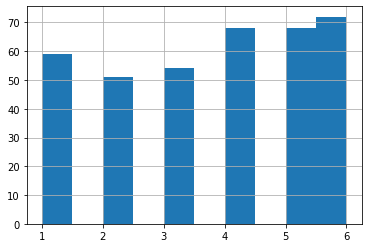

In [11]:
# どの被験者もバランスいい感じ...? -> それなりよかった
unique_subject_id = subject_train['subject_id'].unique()
all_df.groupby('subject_id').get_group(unique_subject_id[5])['activity_label'].hist()

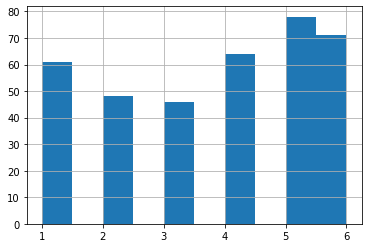

In [12]:
all_df.groupby('subject_id').get_group(unique_subject_id[12])['activity_label'].hist()